In [121]:
#impor needed Python libraries
import numpy as np
import csv
import random
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scistats
import math
import pylab
import statsmodels as sm

#graphics parameters of the notebook
# display graphs inline
%matplotlib inline

# Make graphs prettier
pd.set_option('display.max_columns', 15)
pd.set_option('display.line_width', 400)
pd.set_option('display.mpl_style', 'default')

# Make the fonts bigger
plt.rc('figure', figsize=(14, 7))
plt.rc('font', family='normal', weight='bold', size=15)

line_width has been deprecated, use display.width instead (currently both are
identical)



/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3.py:215: Warning: Source ID 7 was not found when attempting to remove it
  GLib.source_remove(self._idle_event_id)


# I\ Data integration and features extraction

### Data integration

In [2]:
#inegrate data from 2006-2007 to 2014-2015 seasons from different files
data_14_15 = pd.read_csv("./data/2014_2015.csv", parse_dates=True)
data_13_14 = pd.read_csv("./data/2013_2014.csv", parse_dates=True)
data_12_13 = pd.read_csv("./data/2012_2013.csv", parse_dates=True)
data_11_12 = pd.read_csv("./data/2011_2012.csv", parse_dates=True)
data_10_11 = pd.read_csv("./data/2010_2011.csv", parse_dates=True)
data_09_10 = pd.read_csv("./data/2009_2010.csv", parse_dates=True)
data_08_09 = pd.read_csv("./data/2008_2009.csv", parse_dates=True)
data_07_08 = pd.read_csv("./data/2007_2008.csv", parse_dates=True)
data_06_07 = pd.read_csv("./data/2006_2007.csv", parse_dates=True)
data_05_06 = pd.read_csv("./data/2005_2006.csv", parse_dates=True)


#test about data consistency for all files
for df in [data_14_15, data_13_14, data_12_13, data_11_12, data_10_11, data_09_10, data_08_09, data_07_08, data_06_07, data_05_06]:
    print("Nber of df columns : " + str(len(data_14_15.columns)))

Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65
Nber of df columns : 65


In [208]:
data_04_05 = pd.read_csv("./data/m2004_2005.csv", parse_dates=True)
data_03_04 = pd.read_csv("./data/m2003_2004.csv", parse_dates=True)
data_02_03 = pd.read_csv("./data/m2002_2003.csv", parse_dates=True)
data_01_02 = pd.read_csv("./data/m2001_2002.csv", parse_dates=True)

data_02_03.loc[:,'Date'] = data_02_03.Date.map(lambda x: x[0:6] + x[8:])

0      17/08/02
1      17/08/02
2      17/08/02
3      17/08/02
4      17/08/02
5      17/08/02
6      17/08/02
7      18/08/02
8      18/08/02
9      19/08/02
10     23/08/02
11     24/08/02
12     24/08/02
13     24/08/02
14     24/08/02
15     24/08/02
16     24/08/02
17     24/08/02
18     24/08/02
19     24/08/02
20     27/08/02
21     27/08/02
22     28/08/02
23     28/08/02
24     28/08/02
25     28/08/02
26     28/08/02
27     31/08/02
28     31/08/02
29     31/08/02
         ...   
350    26/04/03
351    26/04/03
352    26/04/03
353    26/04/03
354    26/04/03
355    26/04/03
356    26/04/03
357    27/04/03
358    27/04/03
359    03/05/03
360    03/05/03
361    03/05/03
362    03/05/03
363    03/05/03
364    03/05/03
365    03/05/03
366    03/05/03
367    03/05/03
368    04/05/03
369    07/05/03
370    11/05/03
371    11/05/03
372    11/05/03
373    11/05/03
374    11/05/03
375    11/05/03
376    11/05/03
377    11/05/03
378    11/05/03
379    11/05/03
Name: Date, dtype: objec

In [4]:
#integrate data in a single df
raw_data = pd.concat([data_14_15, data_13_14, data_12_13,
                      data_11_12, data_10_11, data_09_10,
                      data_08_09, data_07_08, data_06_07, 
                      data_05_06, data_04_05, data_03_04, 
                      data_02_03, data_01_02])
                      #data_01_02, data_00_01])
raw_data.columns

Index(['ABP', 'AC', 'AF', 'AHW', 'AO', 'AR', 'AS', 'AST', 'AY', 'Attendance',
       'AwayTeam', 'B365A', 'B365D', 'B365H', 'BSA', 'BSD', 'BSH', 'BWA',
       'BWD', 'BWH', 'Bb1X2', 'BbAH', 'BbAHh', 'BbAv<2.5', 'BbAv>2.5', 'BbAvA',
       'BbAvAHA', 'BbAvAHH', 'BbAvD', 'BbAvH', 'BbMx<2.5', 'BbMx>2.5', 'BbMxA',
       'BbMxAHA', 'BbMxAHH', 'BbMxD', 'BbMxH', 'BbOU', 'Date', 'Div', 'FTAG',
       'FTHG', 'FTR', 'GBA', 'GBD', 'GBH', 'HBP', 'HC', 'HF', 'HHW', 'HO',
       'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HTR', 'HY', 'HomeTeam', 'IWA',
       'IWD', 'IWH', 'LBA', 'LBD', 'LBH', 'PSA', 'PSD', 'PSH', 'Referee',
       'SBA', 'SBD', 'SBH', 'SJA', 'SJD', 'SJH', 'VCA', 'VCD', 'VCH', 'WHA',
       'WHD', 'WHH'],
      dtype='object')

### Basic data manipulation

In [61]:
#Select useful features for datavisualization and analysis purposes
E0_data = raw_data[["Date", "HomeTeam", "AwayTeam", "FTHG", "FTAG",
                    "FTR", "HTAG", 'B365A', 'B365D', 'B365H', 'BSA', 
                    'BSD', 'BSH', 'BWA', 'BWD', 'BWH', 'GBA', 'GBD',
                    'GBH', 'IWA', 'IWD', 'IWH', 'LBA', 'LBD', 'LBH',
                    'PSA', 'PSD', 'PSH', 'SBA', 'SBD', 'SBH', 'SJA',
                    'SJD', 'SJH', 'VCA', 'VCD', 'VCH', 'WHA','WHD', 'WHH']]

#convert date format to YYYY-MM-DD classic format
E0_data.Date = E0_data.Date.map(lambda x : "20" + x[6:8] + "-" + x[3:5] + "-" + x[0:2])

#sort data by date
E0_data.sort('Date', inplace=True)

#reset data indexes
E0_data = E0_data.reset_index(drop=True)

#create matchID column
E0_data['matchID'] = E0_data.index

#create season feature
E0_data['Season'] = 0
E0_data.Season = E0_data.Date.map(lambda x : int(x[0:4]) if int(x[5:7]) > 6 else int(x[0:4]) - 1)

#null values test
E0_data.isnull().any()

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Date        False
HomeTeam    False
AwayTeam    False
FTHG        False
FTAG        False
FTR         False
HTAG        False
B365A        True
B365D        True
B365H        True
BSA          True
BSD          True
BSH          True
BWA          True
BWD          True
BWH          True
GBA          True
GBD          True
GBH          True
IWA          True
IWD          True
IWH          True
LBA          True
LBD          True
LBH          True
PSA          True
PSD          True
PSH          True
SBA          True
SBD          True
SBH          True
SJA          True
SJD          True
SJH          True
VCA          True
VCD          True
VCH          True
WHA          True
WHD          True
WHH          True
matchID     False
Season      False
dtype: bool

In [62]:
#create teams list
teams = E0_data['HomeTeam'].unique()
print(teams)

#create seasons list
seasons = np.sort(E0_data['Season'].unique())
print(seasons)

#create dictionary containing teams list by season
teams_by_season = {season : E0_data[E0_data['Season'] == season]['HomeTeam'].unique() for season in seasons}

['Charlton' 'Derby' 'Leeds' 'Leicester' 'Liverpool' 'Middlesbrough'
 'Sunderland' 'Tottenham' 'Chelsea' 'Man United' 'Everton' 'Arsenal'
 'Bolton' 'Ipswich' 'Blackburn' 'Fulham' 'Southampton' 'West Ham'
 'Aston Villa' 'Newcastle' 'Birmingham' 'Man City' 'Middlesboro'
 'West Brom' 'Portsmouth' 'Wolves' 'Norwich' 'Crystal Palace' 'Wigan'
 'Reading' 'Sheffield United' 'Watford' 'Hull' 'Stoke' 'Burnley'
 'Blackpool' 'QPR' 'Swansea' 'Cardiff']
[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]


In [63]:
#match day feature construction for HomeTeam and AwayTeam (1st match of a season --> 1, last --> 38 because 20 team play by season)
E0_HT_grpby = E0_data.groupby('HomeTeam')[['Date']]
E0_AT_grpby = E0_data.groupby('AwayTeam')[['Date']]

def fxyH(row):
    x = row['HomeTeam']
    y = row['Date']
    df1 = E0_HT_grpby.get_group(x)
    df2 = E0_AT_grpby.get_group(x)
    df1 = df1[df1['Date'] < y]
    df2 = df2[df2['Date'] < y]
    day = (1 + len(df1) + len(df2)) % 38
    return 38 if day == 0 else day 

def fxyA(row):
    x = row['AwayTeam']
    y = row['Date']
    df1 = E0_HT_grpby.get_group(x)
    df2 = E0_AT_grpby.get_group(x)
    df1 = df1[df1['Date'] < y]
    df2 = df2[df2['Date'] < y]
    day = (1 + len(df1) + len(df2)) % 38
    return 38 if day == 0 else day 

E0_data['HomeTeamDay'] = E0_data.apply(fxyH, axis=1)
E0_data['AwayTeamDay'] = E0_data.apply(fxyA, axis=1)

In [64]:
E0_data['ones'] = 1
for season in seasons:
    for team in teams_by_season[season]:
        sH = E0_data[(E0_data['HomeTeam'] == team) & (E0_data['Season'] == season)]['ones']
        E0_data.loc[sH.index, 'HomeTeamHomeDay'] = sH.cumsum()
        
        sA = E0_data[(E0_data['AwayTeam'] == team) & (E0_data['Season'] == season)]['ones']
        E0_data.loc[sA.index, 'AwayTeamAwayDay'] = sA.cumsum()

In [65]:
def resultConverter(A):
    if A == 'H':
        return 'W'
    elif A =='A':
        return 'L'
    else:
        return 'D'

def resultInverser(A):
    if A == 'W':
        return 'L'
    elif A == 'L':
        return 'W'
    else:
        return 'D'
def ordinalResultConverter(A):
    if A == 'W':
        return 1
    elif A == 'L':
        return 0
    else:
        return 0.5
    
#make dummies variables for FTR (result of match), HW = Home Win, AW = Away Win, D = draw
E0_data['HW'] = E0_data.FTR.map(lambda x : 1 if x == 'H' else 0)
E0_data['AW'] = E0_data.FTR.map(lambda x : 1 if x == 'A' else 0)
E0_data['D']= E0_data.FTR.map(lambda x : 1 if x == 'D' else 0)

#make 2 different variable for the result of a match : 1 for the home team point of view, the other for the away team pt of view
E0_data['HR'] = E0_data.FTR.map(lambda x : resultConverter(x))
E0_data['AR'] = E0_data.HR.map(lambda x : resultInverser(x))

#make ordinal variable for the home team point of view result (1 = win, 0.5 = Draw, 0 = loss)
E0_data['ordinalHR'] = E0_data.HR.map(lambda x : ordinalResultConverter(x))

### Past performances features extraction

In [66]:
grp_by_HT = E0_data.groupby('HomeTeam')
grp_by_AT = E0_data.groupby('AwayTeam')

grp_by_HT_and_season = E0_data.groupby(['HomeTeam', 'Season'])
grp_by_AT_and_season = E0_data.groupby(['AwayTeam', 'Season'])

#past performance features engineering
for team in teams:
    
    #we retrieve results series of the team
    teamHomeResults_s = grp_by_HT.get_group(team)['HR']
    teamAwayResults_s = grp_by_AT.get_group(team)['AR']
    #combine these 2 series and sort the obtained serie
    teamResults_s = pd.concat([teamHomeResults_s, teamAwayResults_s]).sort_index()

    #(i) compute k_last_HR and k_last_AR --> 6 features
    lag1TeamResults_d = teamResults_s.shift(1).to_dict()
    lag2TeamResults_d = teamResults_s.shift(2).to_dict()
    lag3TeamResults_d = teamResults_s.shift(3).to_dict()
    
    #k_last_HTR and k_last_ATR are just shifted versions of the results series
    E0_data.loc[teamHomeResults_s.index,'1_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag1TeamResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'2_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag2TeamResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'3_last_HTR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag3TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'1_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag1TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'2_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag2TeamResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'3_last_ATR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag3TeamResults_d[x])
    
    #(ii) Compute k_last_HTRH and k_last ATAR --> 4 features
    #we need here to diferentiate home results and past results. Python dictionaries allows the program to access to
    #needed data faster than with a Pandas serie
    lag1TeamHomeResults_d = teamHomeResults_s.shift(1).to_dict()
    lag2TeamHomeResults_d = teamHomeResults_s.shift(2).to_dict()
    lag1TeamAwayResults_d = teamAwayResults_s.shift(1).to_dict()
    lag2TeamAwayResults_d = teamAwayResults_s.shift(2).to_dict()
    
    E0_data.loc[teamHomeResults_s.index,'1_last_HTHR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag1TeamHomeResults_d[x])
    E0_data.loc[teamHomeResults_s.index,'2_last_HTHR'] = E0_data.loc[teamHomeResults_s.index,:].index.map(lambda x : lag2TeamHomeResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'1_last_ATAR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag1TeamAwayResults_d[x])
    E0_data.loc[teamAwayResults_s.index,'2_last_ATAR'] = E0_data.loc[teamAwayResults_s.index,:].index.map(lambda x : lag2TeamAwayResults_d[x])
    
    #(iii) rates based features : we need to get only season specific results series (to avoid taking previous season results into season rates)
    for season in seasons:
        
        if team in teams_by_season[season]:
            #retrieve season specific results serie (1 win serie, 1 draw serie the loss  will be computed thanks to
            #the 2 others)
            teamHomeResultsW_s = grp_by_HT_and_season.get_group((team,season))['HW']
            teamAwayResultsW_s = grp_by_AT_and_season.get_group((team,season))['AW']
            teamResultsW_s = pd.concat([teamHomeResultsW_s, teamAwayResultsW_s]).sort_index()

            teamHomeResultsD_s = grp_by_HT_and_season.get_group((team,season))['D']
            teamAwayResultsD_s = grp_by_AT_and_season.get_group((team,season))['D']
            teamResultsD_s = pd.concat([teamHomeResultsD_s, teamAwayResultsD_s]).sort_index()
        
            #(0) compute HW rates, HL rates, AW rates, LW rates since begining of season
            teamResultsWCumul_d = teamResultsW_s.shift(1).cumsum().to_dict()
            teamResultsDCumul_d = teamResultsD_s.shift(1).cumsum().to_dict()

            #(i) compute 7_HTW_rate, 12_HTW_rate, 7_HTD_rate, 12_HTD_rate, 7_ATW_rate, 12_ATW_rate, 7_ATD_rate, 12_ATD_rate --> 8 features
            win7TeamResultsW_d = pd.rolling_mean(teamResultsW_s.shift(1), window = 7, min_periods = 4).to_dict()
            win12TeamResultsW_d = pd.rolling_mean(teamResultsW_s.shift(1), window = 12, min_periods = 4).to_dict()
            win7TeamResultsD_d = pd.rolling_mean(teamResultsD_s.shift(1), window = 7, min_periods = 4).to_dict()
            win12TeamResultsD_d = pd.rolling_mean(teamResultsD_s.shift(1), window = 12, min_periods = 4).to_dict()
        
            E0_data.loc[teamHomeResultsW_s.index,'HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamResultsWCumul_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamResultsWCumul_d[x])
            E0_data.loc[teamHomeResultsW_s.index,'HTD_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamResultsDCumul_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'ATD_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamResultsDCumul_d[x])
        
            E0_data.loc[teamHomeResultsW_s.index,'7_HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win7TeamResultsW_d[x])
            E0_data.loc[teamHomeResultsW_s.index,'12_HTW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win12TeamResultsW_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'7_ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win7TeamResultsW_d[x])
            E0_data.loc[teamAwayResultsW_s.index,'12_ATW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win12TeamResultsW_d[x])
        
            E0_data.loc[teamHomeResultsD_s.index,'7_HTD_rate'] = E0_data.loc[teamHomeResultsD_s.index,:].index.map(lambda x : win7TeamResultsD_d[x])
            E0_data.loc[teamHomeResultsD_s.index,'12_HTD_rate'] = E0_data.loc[teamHomeResultsD_s.index,:].index.map(lambda x : win12TeamResultsD_d[x])
            E0_data.loc[teamAwayResultsD_s.index,'7_ATD_rate'] = E0_data.loc[teamAwayResultsD_s.index,:].index.map(lambda x : win7TeamResultsD_d[x])
            E0_data.loc[teamAwayResultsD_s.index,'12_ATD_rate'] = E0_data.loc[teamAwayResultsD_s.index,:].index.map(lambda x : win12TeamResultsD_d[x])

        #(ii) compute 5_HTHW_rate and 5_ATAW_rate
        win5TeamResultsHomeW_d = pd.rolling_mean(teamHomeResultsW_s.shift(1), window = 5, min_periods = 1).to_dict()
        win5TeamResultsAwayW_d = pd.rolling_mean(teamAwayResultsW_s.shift(1), window = 5, min_periods = 1).to_dict()
        E0_data.loc[teamHomeResultsW_s.index,'5_HTHW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : win5TeamResultsHomeW_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'5_ATAW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : win5TeamResultsAwayW_d[x])
        
        #(iii) compute HTHW_rate, ATAW_rate, HTHD_rate, ATAD_rate
        teamHomeResultsCumulW_d = teamHomeResultsW_s.shift(1).cumsum().to_dict()
        teamHomeResultsCumulD_d = teamHomeResultsD_s.shift(1).cumsum().to_dict()
        teamAwayResultsCumulW_d = teamAwayResultsW_s.shift(1).cumsum().to_dict()
        teamAwayResultsCumulD_d = teamAwayResultsD_s.shift(1).cumsum().to_dict()
        E0_data.loc[teamHomeResultsW_s.index,'HTHW_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamHomeResultsCumulW_d[x])
        E0_data.loc[teamHomeResultsW_s.index,'HTHD_rate'] = E0_data.loc[teamHomeResultsW_s.index,:].index.map(lambda x : teamHomeResultsCumulD_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'ATAW_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamAwayResultsCumulW_d[x])
        E0_data.loc[teamAwayResultsW_s.index,'ATAD_rate'] = E0_data.loc[teamAwayResultsW_s.index,:].index.map(lambda x : teamAwayResultsCumulD_d[x])


        
#compute missing features k_XTL_rate thanks to the k_XTW_rate and k_XTD_rate features
E0_data.loc[:,'7_HTL_rate'] = 1 - (E0_data['7_HTW_rate'] + E0_data['7_HTD_rate'])
E0_data.loc[:,'12_HTL_rate'] = 1 - (E0_data['7_HTW_rate'] + E0_data['7_HTD_rate'])
E0_data.loc[:,'7_ATL_rate'] = 1 - (E0_data['7_ATW_rate'] + E0_data['7_ATD_rate'])
E0_data.loc[:,'12_ATL_rate'] = 1 - (E0_data['7_ATW_rate'] + E0_data['7_ATD_rate'])

E0_data.loc[:,'HTW_rate'] = E0_data['HTW_rate']/E0_data['HomeTeamDay']
E0_data.loc[:,'ATW_rate'] = E0_data['ATW_rate']/E0_data['AwayTeamDay']
E0_data.loc[:,'HTD_rate'] = E0_data['HTD_rate']/E0_data['HomeTeamDay']
E0_data.loc[:,'ATD_rate'] = E0_data['ATD_rate']/E0_data['AwayTeamDay']
E0_data.loc[:,'HTL_rate'] = 1 - (E0_data['HTW_rate'] + E0_data['HTD_rate'])
E0_data.loc[:,'ATL_rate'] = 1 - (E0_data['ATW_rate'] + E0_data['ATD_rate'])

E0_data.loc[:,'HTHW_rate'] = E0_data['HTHW_rate']/E0_data['HomeTeamHomeDay']
E0_data.loc[:,'ATAW_rate'] = E0_data['ATAW_rate']/E0_data['AwayTeamAwayDay']
E0_data.loc[:,'HTHD_rate'] = E0_data['HTHD_rate']/E0_data['HomeTeamHomeDay']
E0_data.loc[:,'ATAD_rate'] = E0_data['ATAD_rate']/E0_data['AwayTeamAwayDay']
E0_data.loc[:,'HTHL_rate'] = 1 - (E0_data['HTHW_rate'] + E0_data['HTHD_rate'])
E0_data.loc[:,'ATAL_rate'] = 1 - (E0_data['ATAW_rate'] + E0_data['ATAD_rate'])

### Elo ranking feature extraction

In [70]:
#Elo ranking method parameters
k = 20.0
d = 400.0
c = 10.0

#Initialization of output containers
ELO_dict = dict()
gammaHT_dict = dict()
gammaAT_dict = dict()

#intermediate data containers initilization
latest_update_d = dict() #contains latest updates in date of ELO_dict
prev_ELO_score_d = dict() #contains latest ELO_score given to a team for computing new one

prev_season_teams = [team for team in teams] #contains list of teams for the current season
last_teams_ELO_av = 0.0 #contains ELO average of last previous season teams

for team in teams:
    latest_update_d[team] = '2001-01-01'
    prev_ELO_score_d[team] = 0.0

for season in E0_data.Season.unique():
    season_match_dates = E0_data[E0_data['Season'] == season].Date.unique()
    season_teams = E0_data[E0_data['Season'] == season].HomeTeam.unique()
    last_season_date = season_match_dates[len(season_match_dates) - 1]
    
    for Steam in season_teams:
        if not (Steam in prev_season_teams):
            prev_ELO_score_d[Steam] = last_teams_ELO_av
            
    for date in season_match_dates:
        for team in teams:
            if not ((team in E0_data[E0_data['Date'] == date]['HomeTeam'].values) | (team in E0_data[E0_data['Date'] == date]['AwayTeam'].values)):
                ELO_dict[(team, date)] = prev_ELO_score_d[team]
                latest_update_d[team] = date
            else:
                if latest_update_d[team] < date:
                    Hteam = E0_data[(E0_data['Date'] == date) & ((E0_data['HomeTeam'] == team) | (E0_data['AwayTeam'] == team))]['HomeTeam'].values[0]
                    Ateam = E0_data[(E0_data['Date'] == date) & ((E0_data['HomeTeam'] == team) | (E0_data['AwayTeam'] == team))]['AwayTeam'].values[0]
            
                    l0H = prev_ELO_score_d[Hteam]
                    l0A = prev_ELO_score_d[Ateam]
                    gammaH = 1.0/(1.0 + c**((l0A - l0H)/d))
                    gammaA = 1.0 - gammaH
                    alphaH = E0_data[(E0_data['Date'] == date) & (E0_data['HomeTeam'] == Hteam)]['ordinalHR'].values[0]
                    alphaA = 1 - alphaH
            
                    #compute new scores
                    new_HT_ELO_score = l0H + k * (alphaH - gammaH)
                    new_AT_ELO_score = l0A + k * (alphaA - gammaA)

                    #put new scores in ELO_dict
                    ELO_dict[(Hteam, date)] = new_HT_ELO_score
                    ELO_dict[(Ateam, date)] = new_AT_ELO_score
                    gammaHT_dict[(Hteam, date)] = gammaH
                    gammaAT_dict[(Ateam, date)] = gammaA
                    latest_update_d[Hteam] = date
                    latest_update_d[Ateam] = date
            
                    #update prev_ELO_score_d and latest_update_d
                    prev_ELO_score_d[Hteam] = new_HT_ELO_score
                    prev_ELO_score_d[Ateam] = new_AT_ELO_score
        
        if date == last_season_date:
            ELOs = np.array([prev_ELO_score_d[Steam] for Steam in season_teams])
            ELOs.sort()
            last_teams_ELO_av = np.mean(ELOs[0:-17])
            prev_season_teams = season_teams

In [71]:
#make HTeamEloScore, ATeamEloScore and gammaHome features from previously computed dictionaries

def HomeTeamEloScore(row):
    return ELO_dict[(row['HomeTeam'], row['Date'])]

def AwayTeamEloScore(row):
    return ELO_dict[(row['AwayTeam'], row['Date'])]

def gammaHTeamDate(row):
    return gammaHT_dict[(row['HomeTeam'], row['Date'])]

E0_data.loc[:,'HTeamEloScore'] = E0_data.apply(HomeTeamEloScore, axis=1) 
E0_data.loc[:,'ATeamEloScore'] = E0_data.apply(AwayTeamEloScore, axis=1) 
E0_data.loc[:,'gammaHome'] = E0_data.apply(gammaHTeamDate, axis=1) 

### Team tiredness feature extraction

In [ ]:
for team in teams:
    homeMatchDates_s = E0_data[E0_data['HomeTeam'] == team]['Date']
    awayMatchDates_s = E0_data[E0_data['AwayTeam'] == team]['Date']
    matchDates_s = pd.concat([homeMatchDates_s, awayMatchDates_s]).sort_index()
    lastMatchDates_s = matchDates_s.shift(1)
    matchDates = matchDates_s.values
        
    E0_data.loc[E0_data['HomeTeam'] == team, 'HTLastMatchDate'] = E0_data.loc[E0_data['HomeTeam'] == team].index.map(lambda x : lastMatchDates_s[x])
    E0_data.loc[E0_data['AwayTeam'] == team, 'ATLastMatchDate'] = E0_data.loc[E0_data['AwayTeam'] == team].index.map(lambda x : lastMatchDates_s[x])
    
def HTdaysBetweenDates(row):
    if not (pd.isnull(row['HTLastMatchDate'])):
        currDate = pd.to_datetime(row['Date'])
        prevDate = pd.to_datetime(row['HTLastMatchDate'])
        ndays = (currDate - prevDate).days 
        if ndays < 20:
            return ndays
        else: 
            return np.nan
    else:
        return np.nan 
    
def ATdaysBetweenDates(row):
    if not (pd.isnull(row['ATLastMatchDate'])):
        currDate = pd.to_datetime(row['Date'])
        prevDate = pd.to_datetime(row['ATLastMatchDate'])
        return (currDate - prevDate).days
    else:
        return np.nan 
    
E0_data.loc[:, 'HTdaysSinceLastMatch'] = E0_data.apply(HTdaysBetweenDates, axis=1)
E0_data.loc[:, 'ATdaysSinceLastMatch'] = E0_data.apply(ATdaysBetweenDates, axis=1)

### Data transformation 

Features to transform before modelization part : 
- k_last_HTR
- k_last_ATR
- k_last_HTHR
- k_last_ATAR

--> 10 features --> 2 * 10 or 3 * 10 features ?

In [72]:
E0_data['1_last_HTR_isW'] = E0_data['1_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_HTR_isL'] = E0_data['1_last_HTR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_HTR_isW'] = E0_data['2_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_HTR_isL'] = E0_data['2_last_HTR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['3_last_HTR_isW'] = E0_data['3_last_HTR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['3_last_HTR_isL'] = E0_data['3_last_HTR'].map(lambda x : 1 if x == 'L' else 0) 

E0_data['1_last_ATR_isW'] = E0_data['1_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_ATR_isL'] = E0_data['1_last_ATR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_ATR_isW'] = E0_data['2_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_ATR_isL'] = E0_data['2_last_ATR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['3_last_ATR_isW'] = E0_data['3_last_ATR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['3_last_ATR_isL'] = E0_data['3_last_ATR'].map(lambda x : 1 if x == 'L' else 0) 

E0_data['1_last_HTHR_isW'] = E0_data['1_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_HTHR_isL'] = E0_data['1_last_HTHR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_HTHR_isW'] = E0_data['2_last_HTHR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_HTHR_isL'] = E0_data['2_last_HTHR'].map(lambda x : 1 if x == 'L' else 0)

E0_data['1_last_ATAR_isW'] = E0_data['1_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['1_last_ATAR_isL'] = E0_data['1_last_ATAR'].map(lambda x : 1 if x == 'L' else 0) 
E0_data['2_last_ATAR_isW'] = E0_data['2_last_ATAR'].map(lambda x : 1 if x == 'W' else 0)
E0_data['2_last_ATAR_isL'] = E0_data['2_last_ATAR'].map(lambda x : 1 if x == 'L' else 0)

#test
#E0_data['1_last_HTR_isW']

# II\ Modelization

In [73]:
"""featuresPool = ['ordinalHR', '1_last_HTR_isW', '1_last_HTR_isL', '2_last_HTR_isW', '2_last_HTR_isL',
                '3_last_HTR_isW', '3_last_HTR_isL',
                '1_last_ATR_isW', '1_last_ATR_isL', '2_last_ATR_isW', '2_last_ATR_isL', 
                '3_last_ATR_isW',  '3_last_ATR_isL', 
                '1_last_HTHR_isW', '1_last_HTHR_isL', '2_last_HTHR_isW', '2_last_HTHR_isL',
                '1_last_ATAR_isW', '1_last_ATAR_isL', '2_last_ATAR_isW', '2_last_ATAR_isL',
                '7_HTW_rate', '12_HTW_rate', '7_ATW_rate', '12_ATW_rate', 
                '7_HTD_rate', '12_HTD_rate', '7_ATD_rate', '12_ATD_rate',
                '7_HTL_rate', '12_HTL_rate', '7_ATL_rate', '12_ATL_rate',
                '5_HTHW_rate', '5_ATAW_rate',  'gammaHome']"""

featuresPool = ['HR', '1_last_HTR_isW', '1_last_HTR_isL', '2_last_HTR_isW', '2_last_HTR_isL',
                '3_last_HTR_isW', '3_last_HTR_isL',
                '1_last_ATR_isW', '1_last_ATR_isL', '2_last_ATR_isW', '2_last_ATR_isL', 
                '3_last_ATR_isW',  '3_last_ATR_isL', 
                '1_last_HTHR_isW', '1_last_HTHR_isL', '2_last_HTHR_isW', '2_last_HTHR_isL',
                '1_last_ATAR_isW', '1_last_ATAR_isL', '2_last_ATAR_isW', '2_last_ATAR_isL',
                '7_HTW_rate', '12_HTW_rate', '7_ATW_rate', '12_ATW_rate', 
                '7_HTD_rate', '12_HTD_rate', '7_ATD_rate', '12_ATD_rate',
                '7_HTL_rate', '12_HTL_rate', '7_ATL_rate', '12_ATL_rate',
                '5_HTHW_rate', '5_ATAW_rate',  'gammaHome']

eloSeasons = [2001, 2002, 2003, 2004]
trainingSeasons = [2005, 2006, 2007, 2008, 2009, 2010, 2011]
testSeasons = [2012, 2013,2014]

E0_data_tr = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]
E0_data_te = E0_data.loc[(E0_data['Season'].isin(testSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]

## Code factorization

#### Folds generator custom function

In [74]:
def foldsGenerator(ixSet, foldMinSize, foldMaxSize, trInitSize, trOptimalSize = -1):
    
    subsetsList = []
    subsetsList.append(ixSet[0:trInitSize])
    Nsubsets = 1
    
    ixSetLength = ixSet.size
    
    unfoldedSetSize = ixSetLength - trInitSize
    prevSubsetStop = trInitSize
    
    while (unfoldedSetSize > foldMaxSize):
        nextFoldSize = random.randint(foldMinSize, foldMaxSize)
        
        subsetsList.append(ixSet[prevSubsetStop:(prevSubsetStop + nextFoldSize)])
        
        unfoldedSetSize -= nextFoldSize
        prevSubsetStop += nextFoldSize
        Nsubsets += 1
    
    subsetsList.append(ixSet[prevSubsetStop:])
    Nsubsets += 1    
    return (Nsubsets, subsetsList)

#test
sub = foldsGenerator(E0_data_tr.index, 40, 55, 700)

#### Score functions implementation

In [75]:
def brierScore(probW, probL, probD, true, classLabels):
    
    trueW = true.map(lambda x : 1 if x == classLabels['W'] else 0).values
    trueL = true.map(lambda x : 1 if x == classLabels['L'] else 0).values
    trueD = true.map(lambda x : 1 if x == classLabels['D'] else 0).values
    
    cumulScore = (probW - trueW)*(probW - trueW) + (probL - trueL)*(probL - trueL) + (probD - trueD)*(probD - trueD)
    
    return float(np.sum(cumulScore))/float(true.index.size)

def rankProbabilityScore(probW, probL, probD, true, classLabels):
    trueW = true.map(lambda x : 1 if x == classLabels['W'] else 0).values
    trueL = true.map(lambda x : 1 if x == classLabels['L'] else 0).values
    trueD = true.map(lambda x : 1 if x == classLabels['D'] else 0).values
    
    true1 = trueL
    true2 = trueL + trueD
    
    prob1 = probL
    prob2 = probL + probD
    
    cumulScore = (prob1 - true1)*(prob1 - true1) + (prob2 - true2) * (prob2 - true2)
    
    return(float(np.sum(cumulScore))/(2.0 * float(true.index.size)))

#### Scores estimations functions

In [76]:
from sklearn import linear_model
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn import preprocessing

def crossValidation(predictors, labels, classLabels, foldGenParams, fitPredFun, fittingParams, scoreFunList, NObsMax = -1):
    
    (Nfold, subsetsList) = foldsGenerator(labels.index, foldGenParams['foldMinSize'], 
                                          foldGenParams['foldMaxSize'], foldGenParams['trInitSize'])
    trSubset = []
    validSubset = subsetsList.pop(0)
    
    k=0
    avScores = np.zeros(3 + len(scoreFunList))
    while (len(subsetsList) > 0) :
        if (k == 0):                
            trSubset = validSubset
        else:
            trSubset = trSubset.append(validSubset)
        if (NObsMax != (-1)):
            trSubset = trSubset[-NObsMax:]
        
        validSubset = subsetsList.pop(0)
    
        predictors_tr = predictors.loc[trSubset,:]
        predictors_val = predictors.loc[validSubset,:]
        labels_tr = labels.loc[trSubset]
        labels_val = labels.loc[validSubset]

        #model fitting + probabilities prediction
        (predLabels, probW, probL, probD) = fitPredFun(predictors_tr, labels_tr, predictors_val, labels_val, fittingParams)

        scores = []
        scores.append(float(len(predictors_val.index)) * accuracy_score(predLabels, labels_val.values))
        if len(labels_val.unique()) > 2:
            scores.append(float(len(predictors_val.index)) * precision_score(predLabels, labels_val, average='weighted'))
            scores.append(float(len(predictors_val.index)) * recall_score(predLabels, labels_val, average='weighted'))
        else:
            scores.append(float(len(predictors_val.index)) * precision_score(predLabels, labels_val, pos_label='W'))
            scores.append(float(len(predictors_val.index)) * recall_score(predLabels, labels_val, pos_label='W'))
        
        for scoreFun in scoreFunList:
            scores.append(float(len(predictors_val.index)) * scoreFun(probW, probL, probD, labels_val, classLabels))
        #print(scoreFun(probW, probL, probD, labels_val, classLabels))
        avScores = avScores + np.array(scores)
        
        k += 1
    return avScores/float(len(labels.index) - foldGenParams['trInitSize'])

### Multi-class Logistic Regression

In [171]:
def simpleLogRegfitPred(trPredictors, trLabels, valPredictors, valLabels, fittingParams):
    
    scaler = preprocessing.StandardScaler().fit(trPredictors)

    logRegFit = linear_model.LogisticRegression(penalty=fittingParams['penalty'], 
                                                C=fittingParams['C'], solver=fittingParams['solver'],
                                                multi_class=fittingParams['multi_class'])
    
    logRegFit.fit(scaler.transform(trPredictors), trLabels.values)
    classes = logRegFit.classes_
    predLabels = logRegFit.predict(scaler.transform(valPredictors))
    probs = logRegFit.predict_proba(scaler.transform(valPredictors))
    probW = probs[:,2]
    probL = probs[:,1]
    probD = probs[:,0]
    
    return (predLabels, probW, probL, probD)

In [78]:
E0_data_tr.isnull().any()

HR                 False
1_last_HTR_isW     False
1_last_HTR_isL     False
2_last_HTR_isW     False
2_last_HTR_isL     False
3_last_HTR_isW     False
3_last_HTR_isL     False
1_last_ATR_isW     False
1_last_ATR_isL     False
2_last_ATR_isW     False
2_last_ATR_isL     False
3_last_ATR_isW     False
3_last_ATR_isL     False
1_last_HTHR_isW    False
1_last_HTHR_isL    False
2_last_HTHR_isW    False
2_last_HTHR_isL    False
1_last_ATAR_isW    False
1_last_ATAR_isL    False
2_last_ATAR_isW    False
2_last_ATAR_isL    False
7_HTW_rate         False
12_HTW_rate        False
7_ATW_rate         False
12_ATW_rate        False
7_HTD_rate         False
12_HTD_rate        False
7_ATD_rate         False
12_ATD_rate        False
7_HTL_rate         False
12_HTL_rate        False
7_ATL_rate         False
12_ATL_rate        False
5_HTHW_rate        False
5_ATAW_rate        False
gammaHome          False
dtype: bool

#### Test for one set of parameters

In [85]:
#test
classFeature = 'HR'
featuresPool = ['gammaHome', 
                '12_HTW_rate', '12_ATW_rate',  '12_HTL_rate', '12_ATL_rate']

predictors = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]
labels = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), classFeature]

foldGenParams = {'foldMinSize': 30, 'foldMaxSize': 40, 'trInitSize': 700}
fitPredFun = simpleLogRegfitPred
fittingParams = {'penalty': 'l2', 'C': 1, 'multi_class':'multinomial', 'solver': 'lbfgs'}
scoreFunList = [brierScore]
classLabels = {'W' : 'W', 'L': 'L', 'D': 'D'}

crossValidation(predictors, labels, classLabels, foldGenParams, fitPredFun, fittingParams, scoreFunList, NObsMax=-1)

array([ 0.53809238,  0.77007502,  0.53809238,  0.60129866])

#### Compute scores for a large set of model with different fitting parameters and prediction process parameters

In [79]:
#fixed parameters
fitPredFun = simpleLogRegfitPred
scoreFunList = [rankProbabilityScore]
predictors = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]
labels = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), classFeature]

classFeature = 'HR'
featuresPool = ['gammaHome', 'HTW_rate', 'HTL_rate',  'ATW_rate', 'ATL_rate']
foldGenParams = {'foldMinSize': 30, 'foldMaxSize': 40, 'trInitSize': 680}
fittingParamRanges = {'C': [i for i in range(1, 50, 1)], 'penalty': ['l1', 'l2']}
fittingParams = {'multi_class': 'ovr', 'solver': 'liblinear'}
metaParamRanges = {'NobsMax' : [-1, 100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100],
                  'featuresPool' : [['gammaHome'], ['gammaHome', 'HTW_rate', 'HTL_rate', 'ATW_rate', 'ATL_rate'], 
                                    ['gammaHome', 'HTHW_rate', 'HTHL_rate', 'ATAW_rate', 'ATAL_rate'], 
                                    ['gammaHome', 'HTW_rate', 'HTL_rate', 'ATW_rate', 'ATL_rate', 
                                     '1_last_HTR_isW', '1_last_HTR_isL', '2_last_HTR_isW', '2_last_HTR_isL', 
                                     '1_last_ATR_isW', '1_last_ATR_isL', '2_last_ATR_isW', '2_last_ATR_isL',
                                     '1_last_HTHR_isW', '1_last_HTHR_isL', '1_last_ATAR_isW', '1_last_ATAR_isL']],
                  'foldMinSize' : [30, 40, 50], 
                  'folgGenOffset' : [5, 10, 15]}

i = 0
metaParamName = 'NobsMax'
multi_logreg_scores = {}
for metaParam in metaParamRanges[metaParamName]:
    for C in fittingParamRanges['C']:
        for penalty in fittingParamRanges['penalty']:
            fittingParams['C'] = C
            fittingParams['penalty'] = penalty
            avScores = np.zeros(3 + len(scoreFunList))
            for j in range(0,20):
            scores = crossValidation(predictors, labels, classLabels, 
                                     foldGenParams, fitPredFun, fittingParams,
                                     scoreFunList, NObsMax=metaParam)
        
                avScores = avScores + scores
            avScores = avScores/float(10)
            multi_logreg_scores[(metaParam, C, penalty)] = avScores

0.192679745006 {'C': 1, 'solver': 'liblinear', 'multi_class': 'ovr', 'penalty': 'l1'}


### "Ordinal classes like" Logistic Regression 

In [29]:
def ordinalLogRegfitPred(trPredictors, trLabels, valPredictors, valLabels, fittingParams):
    
    #transform label set into 2 set of binary classes labels
    trLabelsA = trLabels.map(lambda x : 1 if (x == 'D') | (x =='W') else 0)
    trLabelsB = trLabels.map(lambda x : 1 if (x == 'W') else 0)
    valLabelsA = valLabels.map(lambda x : 1 if (x == 'D') | (x =='W') else 0)
    valLabelsB = valLabels.map(lambda x : 1 if (x == 'W') else 0)

    #fit scaler for predictors to have zero mean and unit std
    scaler = preprocessing.StandardScaler().fit(trPredictors)

    #fit model for label set A and label set B
    logRegFitA = linear_model.LogisticRegression(penalty=fittingParams['penalty'], 
                                                C=fittingParams['C1'], solver=fittingParams['solver'])
    
    logRegFitB = linear_model.LogisticRegression(penalty=fittingParams['penalty'], 
                                                C=fittingParams['C2'], solver=fittingParams['solver'])
    
    logRegFitA.fit(scaler.transform(trPredictors), trLabelsA.values)
    logRegFitB.fit(scaler.transform(trPredictors), trLabelsB.values)
    
    #predict probabilities for 2 classification problems and compute original space probabilities
    probsA = logRegFitA.predict_proba(scaler.transform(valPredictors))
    probsB = logRegFitB.predict_proba(scaler.transform(valPredictors))
    probL = probsA[:,0]
    probW = probsB[:,1]
    probD = 1 - probL - probW
    
    #compute original space predicted labels
    Wbin = (np.ones(len(probW)) * (probW > probL)) * (np.ones(len(probW)) * (probW > probD))
    Dbin = np.empty(len(probW))
    Dbin.fill(0.5)
    Dbin = Dbin * ((np.ones(len(probW)) * (probD > probW)) * (np.ones(len(probW)) * (probD > probL)))
    predLabels = pd.Series(Wbin + Dbin).map(lambda x: ordinalToCapital(x))

    return (predLabels.values, probW, probL, probD)

#### Test for one set of parameters

In [30]:
classFeature = 'HR'
featuresPool = ['gammaHome']

predictors = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]
labels = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), classFeature]

foldGenParams = {'foldMinSize': 30, 'foldMaxSize': 40, 'trInitSize': 700}
fitPredFun = ordinalLogRegfitPred
fittingParams = {'penalty': 'l1', 'C1': 1.0, 'C2': 1.0, 'solver': 'lbfgs'}
scoreFunList = [rankProbabilityScore]
classLabels = {'W' : 'W', 'L': 'L', 'D': 'D'}

crossValidation(predictors, labels, classLabels, foldGenParams, fitPredFun, fittingParams, scoreFunList)

array([ 0.5374925 ,  0.76474671,  0.5374925 ,  0.19173978])

#### Compute scores for a large set of model with different fitting parameters and prediction process parameters

In [151]:
#Code to retrieve best model in the sense of the first function in scoreFunList (based on average over 20 prediction scores estimated by the function crossValidation)
fitPredFun = ordinalLogRegfitPred
scoreFunList = [rankProbabilityScore]
predictors = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]
labels = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), classFeature]

classFeature = 'HR'
featuresPool = ['gammaHome', 'HTHW_rate', 'HTHL_rate', 'ATAW_rate', 'ATAL_rate']
foldGenParams = {'foldMinSize': 40, 'foldMaxSize': 55, 'trInitSize': 700}
fittingParamRanges = {'C1': [0.1, 0.5, 1, 5, 10, 15, 20, 25, 30, 35], 
                      'C2':  [0.1, 0.5, 1, 5, 10, 15, 20, 25, 30, 35],
                      'penalty': ['l1', 'l2']}
fittingParams = {'penalty': 'l1', 'solver': 'liblinear'}

fittingparams_olr_scores_dict = {}
for penalty in fittingParamRanges['penalty']:
    for C1 in fittingParamRanges['C1']:
        for C2 in fittingParamRanges['C2']:
            fittingParams['C1'] = C1
            fittingParams['C2'] = C2
            avScores = np.zeros(3 + len(scoreFunList))
            for j in range(0,15):
                scores = crossValidation(predictors, labels, classLabels, 
                                     foldGenParams, fitPredFun, fittingParams, 
                                     scoreFunList, NObsMax = -1)
                avScores = avScores + scores
        
            avScores = avScores/float(15)
            fittingparams_olr_scores_dict[(penalty, C1, C2)] = avScores

In [154]:
best_accuracy = 0.0
bestAccuracyFittingParams = ()
best_rps = 1.0
bestRpsFittingParams = ()

for key, value in fittingparams_olr_scores_dict.items():
    if value[0] > best_accuracy:
        best_accuracy = value[0]
        bestAccuracyFittingParams = key
        
    if value[3] < best_rps:
        best_rps = value[3]
        bestRpsFittingParams = key
print(best_accuracy, bestAccuracyFittingParams)
print(best_rps, bestRpsFittingParams)

0.541411717656 ('l1', 30, 30)
0.192165424243 ('l2', 0.1, 0.1)


In [146]:
#code for analyzing influence of prediction process metaparameters over the scores function
fitPredFun = ordinalLogRegfitPred
scoreFunList = [rankProbabilityScore]
predictors = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]
labels = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), classFeature]

classFeature = 'HR'
featuresPool = ['gammaHome']
foldGenParams = {'foldMinSize': 30, 'foldMaxSize': 45, 'trInitSize': 700}
fittingParamRanges = {'C1': [0.1, 5, 10, 15, 22, 28, 40], 'C2': [0.1, 5, 10, 15, 22, 29, 40]}
fittingParams = {'penalty': 'l1', 'solver': 'liblinear'}
metaParamRanges = {'NobsMax' : [-1, 100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100],
                  'featuresPool' : [['gammaHome'], ['gammaHome', 'HTW_rate', 'HTL_rate', 'ATW_rate', 'ATL_rate'], 
                                    ['gammaHome', 'HTHW_rate', 'HTHL_rate', 'ATAW_rate', 'ATAL_rate'],
                                    ['gammaHome', 'HTHW_rate', 'HTHL_rate', 'ATAW_rate', 'ATAL_rate',
                                     'HTW_rate', 'HTL_rate', 'ATW_rate', 'ATL_rate'],
                                    ['gammaHome', 'HTW_rate', 'HTL_rate', 'ATW_rate', 'ATL_rate', 
                                     '1_last_HTR_isW', '1_last_HTR_isL', '2_last_HTR_isW', '2_last_HTR_isL', 
                                     '1_last_ATR_isW', '1_last_ATR_isL', '2_last_ATR_isW', '2_last_ATR_isL',
                                     '1_last_HTHR_isW', '1_last_HTHR_isL', '1_last_ATAR_isW', '1_last_ATAR_isL']],
                  'foldMinSize' : [30, 40, 50, 60], 
                  'folgGenOffset' : 20}
bagsizes_olr_scores_dict = {}
i = 0
metaParamName = 'foldMinSize'
for k in range(0, len(metaParamRanges[metaParamName])):
    metaParam = metaParamRanges[metaParamName][k]
    print("Computing models scores for metaParam = " + str(metaParam))
    for C1 in fittingParamRanges['C1']:
        for C2 in fittingParamRanges['C2']:
            fittingParams['C1'] = C1
            fittingParams['C2'] = C2
            avScores = np.zeros(3 + len(scoreFunList))
            for j in range(0,10):
                scores = crossValidation(predictors, labels, classLabels, foldGenParams, fitPredFun, fittingParams, scoreFunList, NObsMax=-1)
                avScores = avScores + scores
            avScores = avScores/float(10)
            bagsizes_olr_scores_dict[(metaParam, C1, C2)] = avScores

Computing models scores for metaParam = 30
Computing models scores for metaParam = 40
Computing models scores for metaParam = 50
Computing models scores for metaParam = 60


In [131]:
writer = csv.writer(open('nobs_ordlr_dict.csv', 'wb'))
for key, value in scores_dict.items():
    writer.writerow([key, value])  

TypeError: 'str' does not support the buffer interface

0.538065448135 0.191772371404
0.531569604446 0.198360228197
0.535100326873 0.192819551179
0.536129916874 0.192017259516
0.537541471298 0.192152652066
0.538437618599 0.19199519658
0.539933645924 0.191799709192
0.537497398479 0.191750042744
0.537672465507 0.191752130925
0.538012805602 0.191784696514
0.537842635555 0.191782256614
0.538362939657 0.191800157563


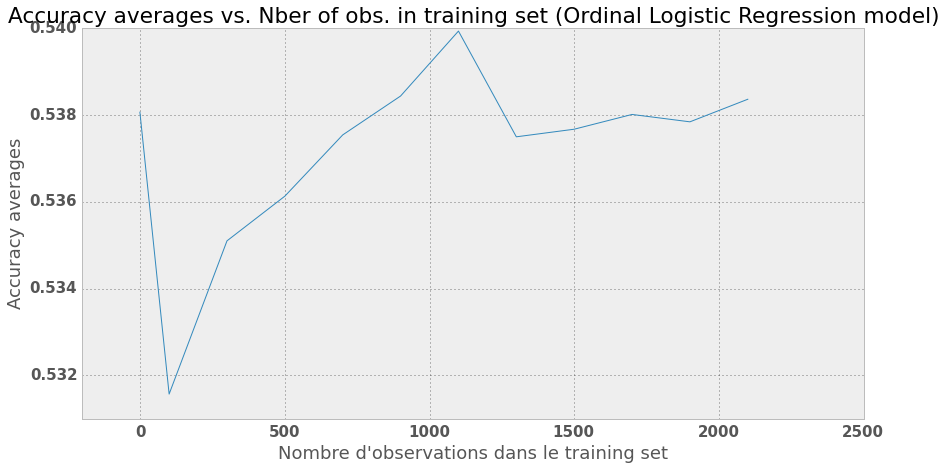

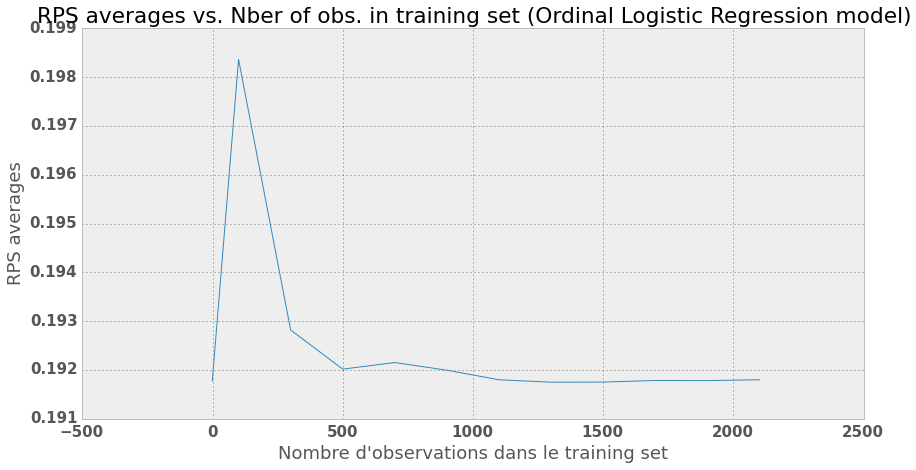

In [136]:
#reader = csv.reader(open('nobs_ordlr_dict.csv', 'r'))
#nobs_lr_scores_dict = dict(reader)

accuracyAvScoresList = []
rpsAvScoresList = []
for metaParam in metaParamRanges['NobsMax']:
    accuracyAv = 0
    rpsAv = 0
    i = 0
    for key, value in scores_dict.items():
        if key[0] == metaParam:
            accuracyAv += value[0]
            rpsAv += value[3]
            i += 1
    accuracyAv /= float(i)
    accuracyAvScoresList.append(accuracyAv)
    rpsAv /= float(i)
    rpsAvScoresList.append(rpsAv)
    print(accuracyAv, rpsAv)
    
plt.figure()
plt.plot(metaParamRanges['NobsMax'], accuracyAvScoresList, label="Accuracy")
plt.xlim((-200,2500))
plt.xlabel("Nombre d'observations dans le training set")
plt.ylabel("Accuracy averages")
plt.title("Accuracy averages vs. Nber of obs. in training set (Ordinal Logistic Regression model)")

plt.figure()
plt.plot(metaParamRanges['NobsMax'], rpsAvScoresList, label="RPS")
plt.xlabel("Nombre d'observations dans le training set")
plt.ylabel("RPS averages")
plt.title("RPS averages vs. Nber of obs. in training set (Ordinal Logistic Regression model)")

In [148]:
accuracyAvScoresList = []
rpsAvScoresList = []
for metaParam in metaParamRanges['foldMinSize']:
    accuracyAv = 0
    rpsAv = 0
    i = 0
    for key, value in bagsizes_olr_scores_dict.items():
        if key[0] == metaParam:
            accuracyAv += value[0]
            rpsAv += value[3]
            i += 1
    accuracyAv /= float(i)
    accuracyAvScoresList.append(accuracyAv)
    rpsAv /= float(i)
    rpsAvScoresList.append(rpsAv)
    print(accuracyAv, rpsAv)
    
"""plt.figure()
plt.plot(range(0,len(metaParamRanges['featuresPool'])), accuracyAvScoresList, label="Accuracy")
#plt.xlim((-200,2500))
plt.xlabel("Features set nb")
plt.ylabel("Accuracy averages")
plt.title("Accuracy averages vs. Nber of obs. in training set (Ordinal Logistic Regression model)")

plt.figure()
plt.plot(range(0,len(metaParamRanges['featuresPool'])), rpsAvScoresList, label="RPS")
plt.xlabel("Nombre d'observations dans le training set")
plt.ylabel("RPS averages")
plt.title("RPS averages vs. Nber of obs. in training set (Ordinal Logistic Regression model)")"""

0.538122987647 0.191772138223
0.538265000061 0.19176471446
0.538093605769 0.191806011376
0.538217254508 0.191810844913


'plt.figure()\nplt.plot(range(0,len(metaParamRanges[\'featuresPool\'])), accuracyAvScoresList, label="Accuracy")\n#plt.xlim((-200,2500))\nplt.xlabel("Features set nb")\nplt.ylabel("Accuracy averages")\nplt.title("Accuracy averages vs. Nber of obs. in training set (Ordinal Logistic Regression model)")\n\nplt.figure()\nplt.plot(range(0,len(metaParamRanges[\'featuresPool\'])), rpsAvScoresList, label="RPS")\nplt.xlabel("Nombre d\'observations dans le training set")\nplt.ylabel("RPS averages")\nplt.title("RPS averages vs. Nber of obs. in training set (Ordinal Logistic Regression model)")'

In [32]:
E0_data['gammaHome'].corr(E0_data['ordinalHR'])
E0_data.loc[2000:3000,['ordinalHR', 'gammaHome']]
df = E0_data_tr[['HR', 'gammaHome']]

def testPredFct(x):
    if x > 0.44:
        return('W')
    elif x < 0.42:
        return('L')
    else: return('D')

df['predLabel'] = df.gammaHome.map(lambda x: testPredFct(x))
accuracy_score(df['HR'], df['predLabel'])

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.5352767215885087

### Random Forrest Classifier

In [160]:
from sklearn.ensemble import RandomForestClassifier

def randomForrestfitPred(trPredictors, trLabels, valPredictors, valLabels, fittingParams):
    
    #no scaling necessary
    #scaler = preprocessing.StandardScaler().fit(trPredictors)

    rfFit = RandomForestClassifier(n_estimators=fittingParams['n_estimators'],
                                   min_samples_split = fittingParams['min_samples_split'],
                                   min_samples_leaf = fittingParams['min_samples_leaf'])
    
    rfFit.fit(trPredictors.values, trLabels.values)
    classes = rfFit.classes_
    predLabels = rfFit.predict(valPredictors)
    probs = rfFit.predict_proba(valPredictors)
    probW = probs[:,2]
    probL = probs[:,1]
    probD = probs[:,0]
    
    return (predLabels, probW, probL, probD)

In [169]:
fitPredFun = randomForrestfitPred
scoreFunList = [rankProbabilityScore]
predictors = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), featuresPool]
labels = E0_data.loc[(E0_data['Season'].isin(trainingSeasons)) & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), classFeature]

classFeature = 'HR'
featuresPool = ['gammaHome', 'HTW_rate', 'HTL_rate',  
                'ATW_rate', 'ATL_rate', 
                '1_last_HTR_isW', '1_last_HTR_isL', '2_last_HTR_isW', '2_last_HTR_isL',
                '1_last_ATR_isW', '1_last_ATR_isL', '2_last_ATR_isW', '2_last_ATR_isL',
               '1_last_HTHR_isW', '1_last_HTHR_isL', '1_last_ATAR_isW', '1_last_ATAR_isL',
               '7_HTW_rate', '7_ATW_rate', '7_HTL_rate', '7_ATL_rate', '5_HTHW_rate', '5_ATAW_rate']
foldGenParams = {'foldMinSize': 30, 'foldMaxSize': 40, 'trInitSize': 700}
fittingParamRanges = {'n_estimators': [50, 100, 200, 500, 1000], 
                      'min_samples_split': [15],
                      'min_samples_leaf': [4]}

accuracy_scores = []
rps_scores = []
i = 0
#fittingParams = {'min_samples_leaf': 4, 'min_samples_leaf':15}
for n_estimators in fittingParamRanges['n_estimators']:
    fittingParams['n_estimators'] = n_estimators 
    for min_samples_split in fittingParamRanges['min_samples_split']:
        fittingParams['min_samples_split'] = min_samples_split
        avScores = np.zeros(3 + len(scoreFunList))
        for j in range(0,10):
            scores = crossValidation(predictors, labels, classLabels, foldGenParams, fitPredFun, fittingParams, scoreFunList, NObsMax=metaParam)
            avScores = avScores + scores
        avScores = avScores/float(10)
        accuracy_scores.append(avScores[0])
        rps_scores.append(avScores[3])

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [165]:
accuracyAvScoresList = []
rpsAvScoresList = []
for n_estimator in fittingParamRanges['n_estimators']:
    accuracyAv = 0
    rpsAv = 0
    i = 0
    for key, value in rf_nestimators_scores_dict.items():
        if key[0] == metaParam:
            accuracyAv += value[0]
            rpsAv += value[3]
            i += 1
    accuracyAv /= float(i)
    accuracyAvScoresList.append(accuracyAv)
    rpsAv /= float(i)
    rpsAvScoresList.append(rpsAv)
    print(accuracyAv, rpsAv)
    
plt.figure()
plt.plot(metaParamRanges['NobsMax'], accuracyAvScoresList, label="Accuracy")
plt.xlim((-200,2500))
plt.xlabel("Nombre d'observations dans le training set")
plt.ylabel("Accuracy averages")
plt.title("Accuracy averages vs. Nber of obs. in training set (Ordinal Logistic Regression model)")

plt.figure()
plt.plot(metaParamRanges['NobsMax'], rpsAvScoresList, label="RPS")
plt.xlabel("Nombre d'observations dans le training set")
plt.ylabel("RPS averages")
plt.title("RPS averages vs. Nber of obs. in training set (Ordinal Logistic Regression model)")

array([ 0.5164967 ,  0.72140887,  0.5164967 ,  0.19929176])

In [34]:
rfClf.feature_importances_

array([ 0.16940816,  0.10230758,  0.10040562,  0.10833392,  0.10063954,
        0.0130969 ,  0.01539612,  0.01309058,  0.01351566,  0.01542662,
        0.01311446,  0.01336862,  0.01311049,  0.01353547,  0.01146017,
        0.01013254,  0.01369392,  0.04213658,  0.04319546,  0.04549855,
        0.04245831,  0.0468998 ,  0.03977492])

# III\ Betting strategies

- Unit and unit win strategies
- Kelly strategy

In [50]:
bet_data = E0_data.loc[E0_data['Season'].isin(testSeasons),['B365A', 'B365D', 'B365H', 'BSA', 
                    'BSD', 'BSH', 'BWA', 'BWD', 'BWH', 'GBA', 'GBD',
                    'GBH', 'IWA', 'IWD', 'IWH', 'LBA', 'LBD', 'LBH',
                    'PSA', 'PSD', 'PSH', 'SBA', 'SBD', 'SBH', 'SJA',
                    'SJD', 'SJH', 'VCA', 'VCD', 'VCH', 'WHA','WHD', 'WHH']]

bet_data.dropna(axis=1, inplace=True)
bet_data.columns
bet_data.loc[:,'maxHWodd'] = bet_data[['B365H', 'BWH', 'VCH', 'WHH']].max(axis=1)
bet_data.loc[:,'maxAWodd'] = bet_data[['B365A', 'BWA', 'VCA', 'WHA']].max(axis=1)
bet_data.loc[:,'maxDWodd'] = bet_data[['B365D', 'BWD', 'VCD', 'WHD']].max(axis=1)

bet_data

,B365A,B365D,B365H,BWA,BWD,BWH,VCA,VCD,VCH,WHA,WHD,WHH,maxHWodd,maxAWodd,maxDWodd
4180,8.50,4.50,1.40,9.00,4.60,1.35,8.50,4.75,1.44,8.00,4.00,1.44,1.44,9.00,4.75
4181,4.50,3.60,1.80,4.40,3.50,1.80,4.75,3.75,1.83,4.50,3.30,1.85,1.85,4.75,3.75
4182,2.75,3.40,2.50,2.75,3.30,2.60,2.75,3.40,2.62,2.80,3.00,2.70,2.70,2.80,3.40
4183,3.80,3.40,2.00,3.60,3.40,2.00,4.00,3.50,2.00,3.80,3.30,2.00,2.00,4.00,3.50
4184,3.10,3.25,2.38,3.10,3.20,2.40,3.25,3.30,2.40,2.90,3.30,2.40,2.40,3.25,3.30
4185,1.91,3.50,4.20,1.85,3.50,4.10,1.95,3.60,4.33,2.00,3.30,3.80,4.33,2.00,3.60
4186,3.40,3.30,2.20,3.30,3.30,2.25,3.40,3.40,2.25,3.20,3.20,2.30,2.30,3.40,3.40
4187,17.00,7.00,1.17,16.00,6.25,1.18,19.00,7.00,1.20,15.00,6.00,1.20,1.20,19.00,7.00
4188,1.62,3.75,6.00,1.55,3.90,6.00,1.65,3.80,6.50,1.67,3.60,5.50,6.50,1.67,3.90
4189,1.83,3.60,4.33,1.83,3.50,4.60,1.87,3.70,4.30,1.91,3.30,4.33,4.60,1.91,3.70


### Prediction over test set

In [204]:
def predict(predictors, labels, trIndex, testIndex, fitPredFun, fittingParams, NObsMax, scoreFunList, classLabels):
    
    currentTrSubset = trIndex
    print(currentTrSubset)
    obsIndex = testIndex[0:1]
    print(obsIndex)
    k=0
    accuracy = 0.0
    rps = 0.0
    
    for i in range(1, len(testIndex)) :
        
        if (NObsMax != (-1)):
            currentTrSubset = currentTrSubset[-NObsMax:]
            
        predictors_tr = predictors.loc[currentTrSubset,:]
        predictors_eval = predictors.loc[obsIndex,:]
        labels_tr = labels.loc[currentTrSubset]
        labels_eval = labels.loc[obsIndex]

        #model fitting + probabilities prediction
        (predLabels, probW, probL, probD) = fitPredFun(predictors_tr, labels_tr, predictors_eval, labels_eval, fittingParams)
        
        if predLabels[0] == labels_eval.values[0]:
            accuracy += 1.0
                
        t1 = (1 if labels_eval.values[0] == 'L' else 0)
        t2 = (1 if ((labels_eval.values[0] == 'L') | (labels_eval.values[0] == 'D')) else 0)
        rps += 0.5 * ((t1 - probL[0]) ** 2 + (t2 - (probL[0] + probD[0])) ** 2)            
        
        #update currentTrSubset and obsIndex
        currentTrSubset.append(obsIndex)
        obsIndex = testIndex[i:i+1]
        k += 1
        
    return (accuracy/len(testIndex), rps/len(testIndex))

In [205]:
featuresPool = ['gammaHome', 'HTHW_rate', 'HTHL_rate', 'ATAW_rate', 'ATAL_rate']

predictors = E0_data.loc[((E0_data['Season'].isin(trainingSeasons)) | (E0_data['Season'].isin(testSeasons))) 
            & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), :]
labels = E0_data.loc[((E0_data['Season'].isin(trainingSeasons)) | (E0_data['Season'].isin(testSeasons))) 
            & (E0_data['HomeTeamDay'] > 4) & (E0_data['AwayTeamDay'] > 4), 'HR']
trIndex = predictors[predictors['Season'].isin(trainingSeasons)].index
testIndex = predictors[predictors['Season'].isin(testSeasons)].index
fitPredFun = simpleLogRegfitPred
fittingParams = {'penalty': 'l2', 'C': 0.1, 'multi_class':'multinomial', 'solver': 'lbfgs'}
classLabels = {'W' : 'W', 'L': 'L', 'D': 'D'}
scoreFunList = [rankProbabilityScore]
NObsMax = -1
predictors = predictors.loc[:,featuresPool]

predict(predictors, labels, trIndex, testIndex, fitPredFun, fittingParams, NObsMax, scoreFunList, classLabels)

Int64Index([1557, 1561, 1564, 1566, 1567, 1568, 1569, 1570, 1571, 1573,
            ...
            4170, 4171, 4172, 4173, 4174, 4175, 4176, 4177, 4178, 4179], dtype='int64', length=2367)
Int64Index([4219], dtype='int64')


(0.5534838076545633, 0.20853688689593541)